In [7]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import imutils
import math
from collections import defaultdict

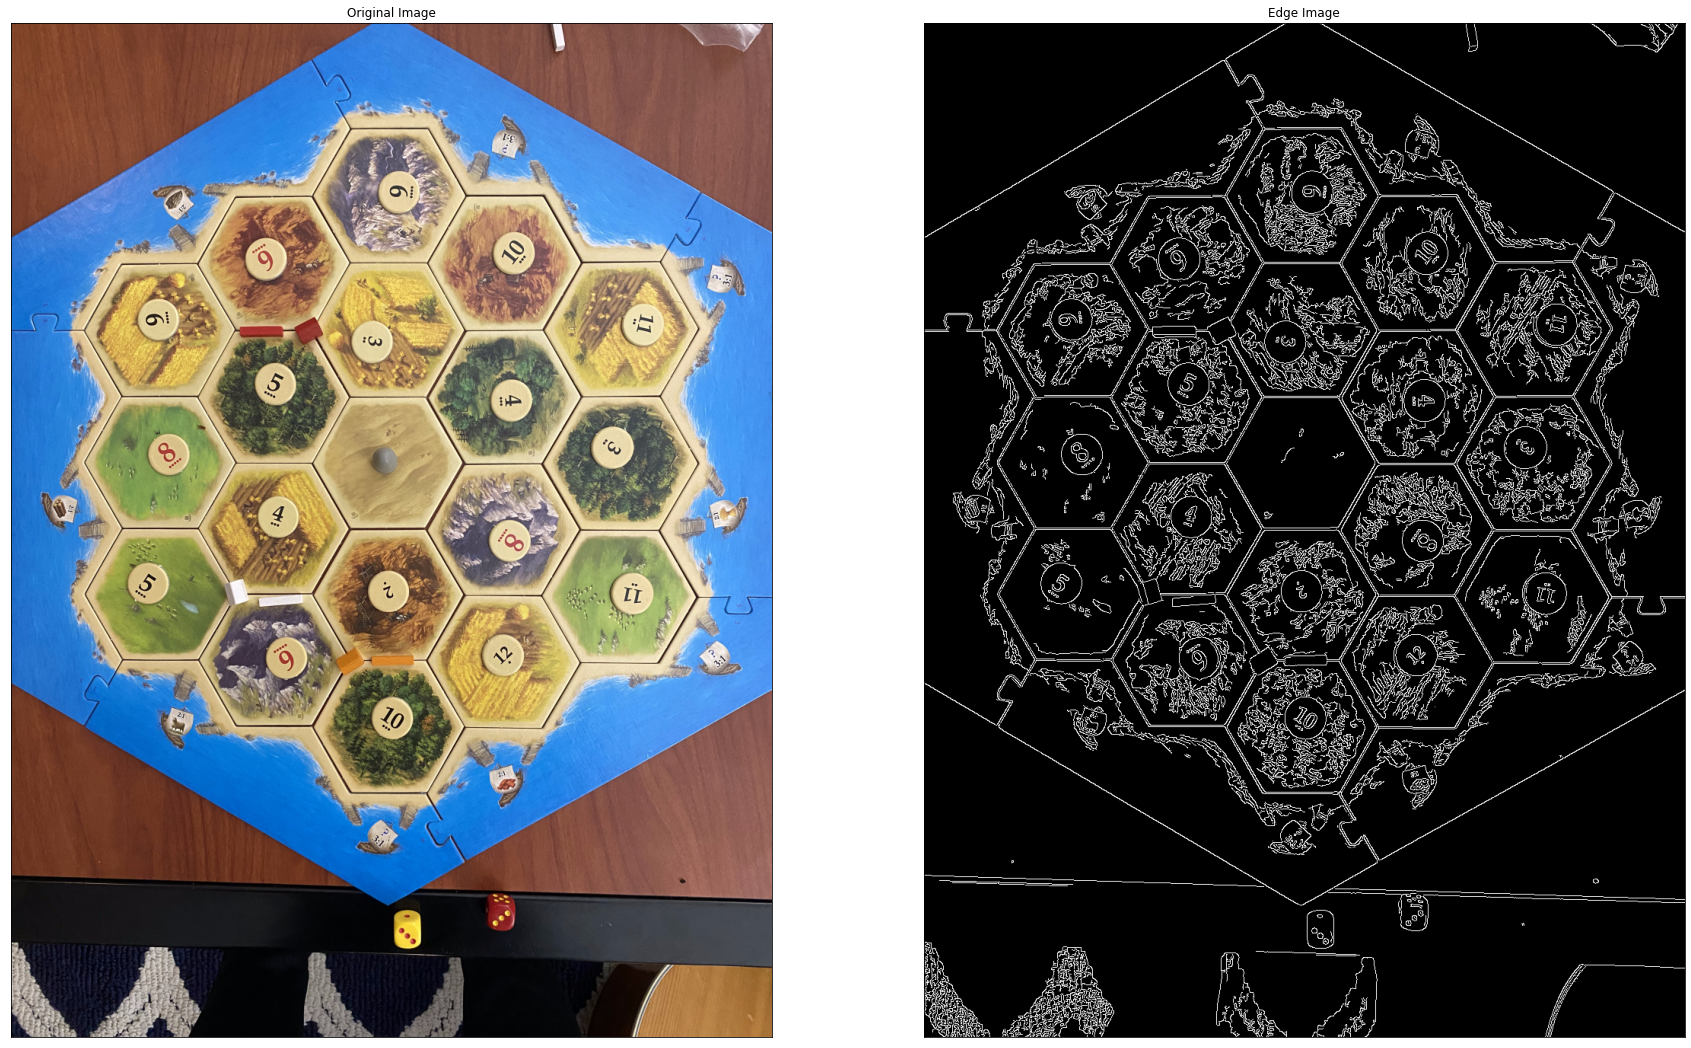

In [8]:
############################################
# Read image and get canny edge detection
############################################

# read img
img = cv.imread('photos/IMG_7864.png')[:,:,::-1]
img = imutils.resize(img, width=1000)
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# get canny
edges = cv.Canny(img,100,300)

# see img
plt.figure(figsize=(30, 30))
plt.subplot(121),plt.imshow(img)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

([], [])

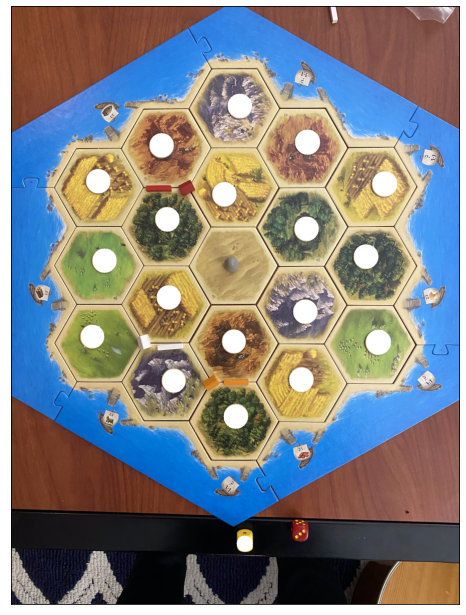

In [9]:
############################################
# get each number circle
############################################

circles = cv.HoughCircles(img_gray,cv.HOUGH_GRADIENT_ALT,1,20,
                            param1=50,param2=.9,minRadius=10,maxRadius=50)
circles = np.uint16(np.around(circles))[0,:,0:3]
circles_img = img.copy()
for circ in circles:
    cv.circle(circles_img,(circ[0],circ[1]),circ[2],(255,255,255),-1)
plt.figure(figsize=(11,11))
plt.imshow(circles_img)
plt.xticks([])
plt.yticks([])

In [13]:
#########################
# get average distance
#########################

num_short_distances = 3 * 6 + 4 * 6 + 6 * 5
all_distances = []

circles = np.array(circles, dtype=np.float64)
def distanceBetweenCircles(c1, c2):
    return math.sqrt(((c1[0] - c2[0]) ** 2) + ((c1[1] - c2[1]) ** 2))

for i in range(len(circles)):
    for j in range(len(circles)):
        if (i != j):
            all_distances.append(distanceBetweenCircles(circles[i], circles[j]))

all_distances.sort()


short_distances_sum = 0
for i in range(num_short_distances):
    short_distances_sum += all_distances[i]

average_distance = short_distances_sum / num_short_distances
print(average_distance)
distance_range = 25

img_copy = img.copy()
circles_map = defaultdict(list)
for i in range(len(circles)):
    for j in range(len(circles)):
        if (distanceBetweenCircles(circles[i], circles[j]) >= average_distance - distance_range and distanceBetweenCircles(circles[i], circles[j]) <= average_distance + distance_range):
            circles_map[i].append(j)
            cv.line(img_copy, (int(circles[i][0]), int(circles[i][1])), (int(circles[j][0]), int(circles[j][1])), (255, 0, 0), 5)






plt.figure(figsize=(11,11))
plt.imshow(img_copy)
plt.xticks([])
plt.yticks([])




177.78896165403694
194.0


error: OpenCV(4.5.4) :-1: error: (-5:Bad argument) in function 'line'
> Overload resolution failed:
>  - Can't parse 'pt1'. Sequence item with index 0 has a wrong type
>  - Can't parse 'pt1'. Sequence item with index 0 has a wrong type
